To produce data used in this notebook, compile the code and run simulations as follows
```bash
./configure.py
make
cd inputs
./run_simulations.py [--suite var_fuv_cr]
./run_simulations.py --suite var_cr
```

To turn on shielding of FUV radiation and CRs, pass `--shld` flag to `run_simulations.py`.

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def read_output(z_g, z_d, chi, xi, rundir='../bin'):
    fname = os.path.join(rundir, '{0:s}_zg{1:.1f}_zd{2:.1f}_chi{3:.1f}_xi{4:.2f}.txt'.\
                         format('noshld', z_g, z_d, chi, xi))
    print(fname)
    df = pd.read_csv(fname, sep=r'\s+')
    df['T'] = df['pok']/(df['nH']*(1.1 + df['xe'] - df['xH2']))
    return df

def decorate_plots(axes):
    plt.sca(axes[0,0])
    plt.ylim(1e2,1e7)
    plt.ylabel(r'$P/k_{\rm B}\;[{\rm cm}^{-3}\,{\rm K}]$')
    
    plt.sca(axes[0,1])
    plt.ylim(1e1,1e4)
    plt.ylabel(r'$T\;[{\rm K}]$')
    
    plt.sca(axes[1,0])
    plt.ylim(1e-4,1)
    plt.ylabel(r'$x_e$')
    
    plt.sca(axes[1,1])
    plt.ylim(1e-28,1e-23)
    plt.ylabel(r'$\Gamma=n_{\rm H}\Lambda\;[{\rm erg}\,{\rm s}^{-1}]$')
    
    for ax in axes.flatten():
        plt.sca(ax)
        plt.xlim(1e-2,1e3)
        plt.xlabel(r'$n_{\rm H}\;[{\rm cm}^{-3}]$')
        plt.grid()

## Vary Z_g and Z_d (fixed FUV $\chi_{\rm FUV,0}=1$ and CR ionization $\xi_{\rm cr,0} = 2\times 10^{-16}$)

-2.0
../bin/noshld_zg-2.0_zd-2.0_chi0.0_xi0.00.txt
-1.0
../bin/noshld_zg-1.0_zd-1.0_chi0.0_xi0.00.txt
0.0
../bin/noshld_zg0.0_zd0.0_chi0.0_xi0.00.txt
0.47712125471966244
../bin/noshld_zg0.5_zd0.5_chi0.0_xi0.00.txt


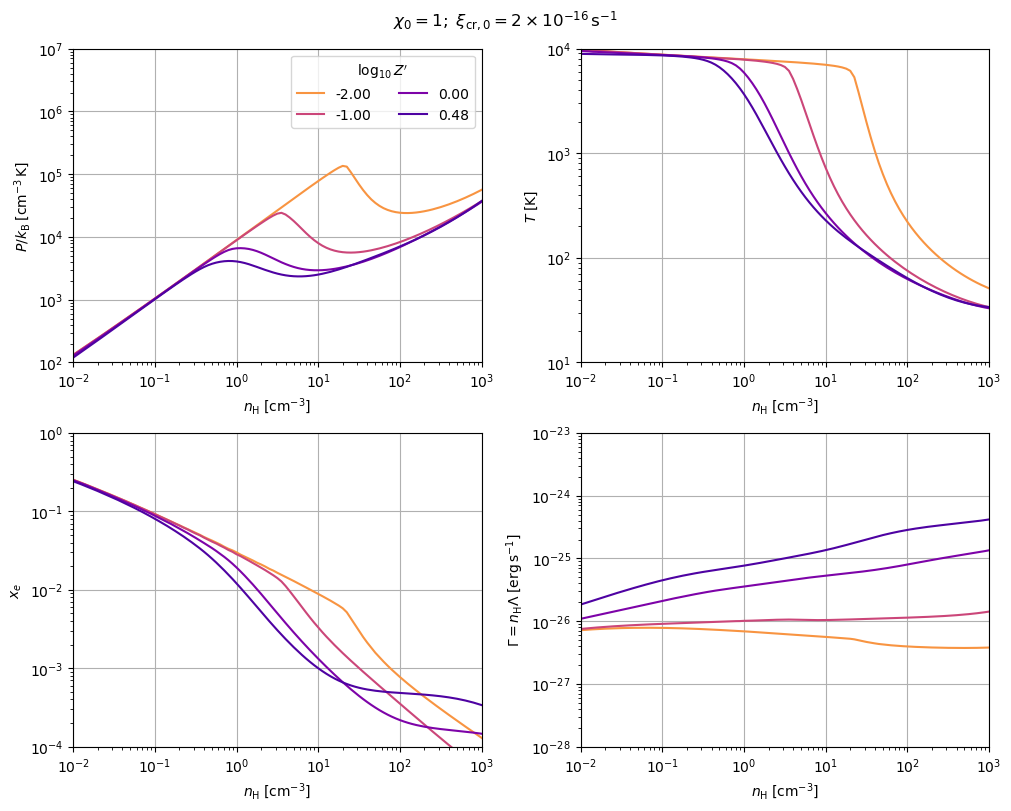

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)
# "log10" of gas metallicity, dust abundance, FUV, and CR ionization rate

z_g = np.array([-2.0, -1.0, 0.0, np.log10(3.0)])
z_d = z_g
chi = 0.0
xi = 0.0
cmap = plt.cm.plasma_r
norm = mpl.colors.Normalize(-3.0, 1.0)
for z_g_, z_d_ in zip(z_g, z_d):
    print(z_g_)
    df = read_output(z_g_, z_d_, chi, xi)
    l, = axes[0,0].loglog(df['nH'], df['pok'], label='{0:.2f}'.format(z_g_), c=cmap(norm(z_g_)))
    axes[0,1].loglog(df['nH'], df['T'], c=l.get_color())
    axes[1,0].loglog(df['nH'], df['xe'], c=l.get_color())
    axes[1,1].loglog(df['nH'], df['Gamma'], c=l.get_color())

decorate_plots(axes)
axes[0,0].legend(ncol=2, title=r'$\log_{10} Z^{\prime}$')
plt.suptitle(r'$\chi_0=1;\;\xi_{\rm cr,0}=2\times 10^{-16}\,{\rm s}^{-1}$');

## Vary FUV and CR together (fixed metallicity)

../bin/noshld_zg0.0_zd0.0_chi-2.0_xi-2.00.txt
../bin/noshld_zg0.0_zd0.0_chi-1.0_xi-1.00.txt
../bin/noshld_zg0.0_zd0.0_chi0.0_xi0.00.txt
../bin/noshld_zg0.0_zd0.0_chi1.0_xi1.00.txt
../bin/noshld_zg0.0_zd0.0_chi2.0_xi2.00.txt


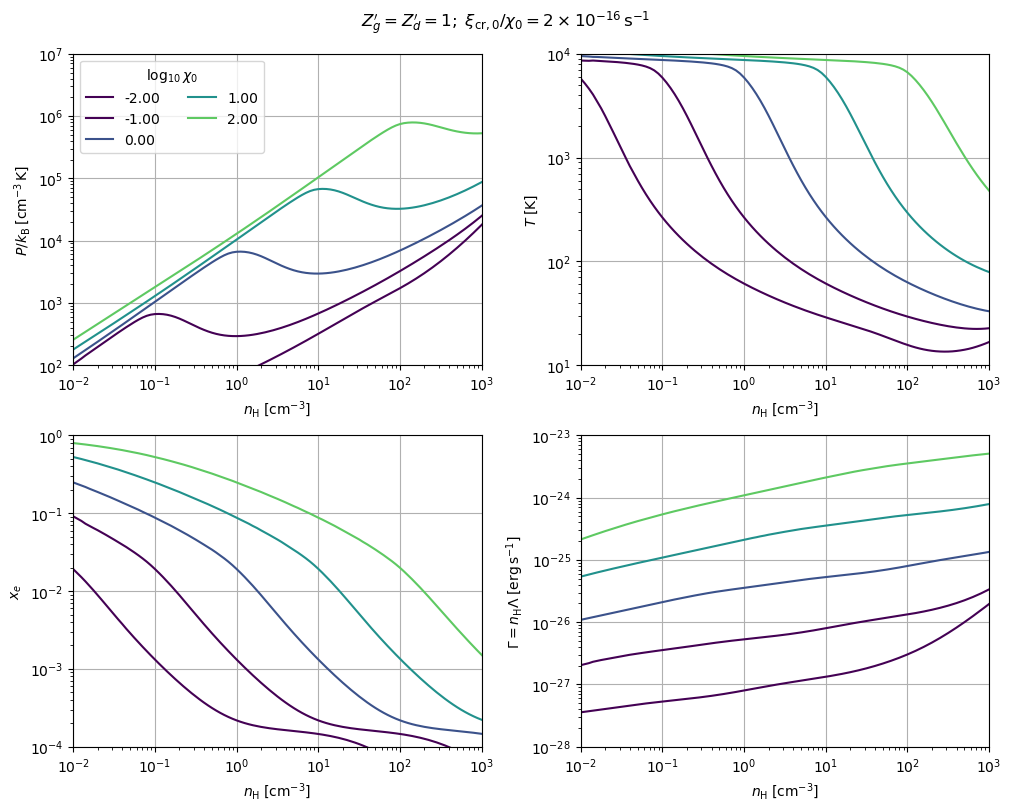

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)
# "log10" of gas metallicity, dust abundance, FUV, and CR ionization rate
z_g = 0.0
z_d = 0.0
chi = np.arange(-2.0, 3.0, 1)
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(-1.0, 3.0)
for chi_ in chi:
    xi_ = chi_
    df = read_output(z_g, z_d, chi_, xi_)
    l, = axes[0,0].loglog(df['nH'], df['pok'], label='{0:.2f}'.format(chi_), c=cmap(norm(chi_)))
    axes[0,1].loglog(df['nH'], df['T'], c=l.get_color())
    axes[1,0].loglog(df['nH'], df['xe'], c=l.get_color())
    axes[1,1].loglog(df['nH'], df['Gamma'], c=l.get_color())

decorate_plots(axes)
axes[0,0].legend(ncol=2, title=r'$\log_{10} \chi_0$')
plt.suptitle(r'$Z^{\prime}_g=Z^{\prime}_d=1;\;\xi_{\rm cr,0}/\chi_0=2\times 10^{-16}\,{\rm s}^{-1}$');

## Vary CR ionization rate only (fixed FUV and metallicity)

../bin/noshld_zg0.0_zd0.0_chi0.0_xi-2.00.txt
../bin/noshld_zg0.0_zd0.0_chi0.0_xi-1.50.txt
../bin/noshld_zg0.0_zd0.0_chi0.0_xi-1.00.txt
../bin/noshld_zg0.0_zd0.0_chi0.0_xi-0.50.txt
../bin/noshld_zg0.0_zd0.0_chi0.0_xi0.00.txt
../bin/noshld_zg0.0_zd0.0_chi0.0_xi0.50.txt


Text(0.5, 0.98, '$Z^{\\prime}_g=Z^{\\prime}_d=1;\\;\\chi_0=1;\\;\\xi_{\\rm cr,0}=2\\times 10^{-16}\\,{\\rm s}^{-1}$')

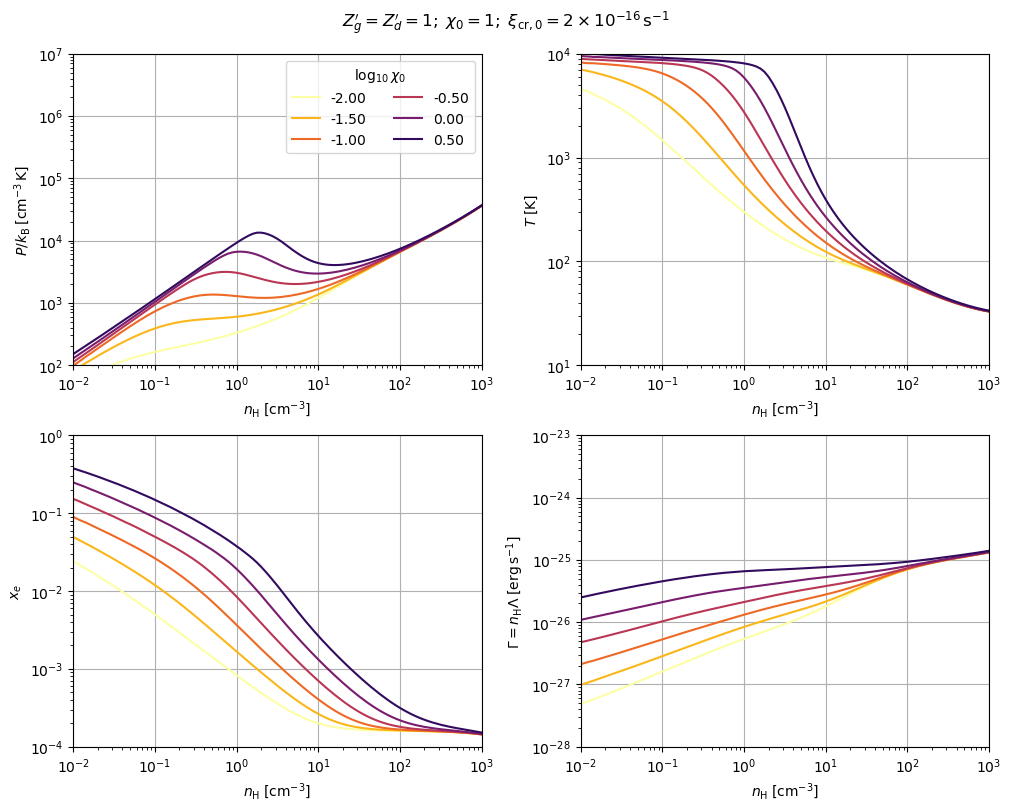

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)
z_g = 0.0
z_d = 0.0
chi = 0.0
xi = np.arange(-2.0, 1.0, 0.5)
cmap = plt.cm.inferno_r
norm = mpl.colors.Normalize(-2.0, 1.0)
for xi_ in xi:
    df = read_output(z_g, z_d, chi, xi_)
    l, = axes[0,0].loglog(df['nH'], df['pok'], label='{0:.2f}'.format(xi_), c=cmap(norm(xi_)))
    axes[0,1].loglog(df['nH'], df['T'], c=l.get_color())
    axes[1,0].loglog(df['nH'], df['xe'], c=l.get_color())
    axes[1,1].loglog(df['nH'], df['Gamma'], c=l.get_color())

decorate_plots(axes)
axes[0,0].legend(ncol=2, title=r'$\log_{10} \chi_0$')
plt.suptitle(r'$Z^{\prime}_g=Z^{\prime}_d=1;\;\chi_0=1;\;\xi_{\rm cr,0}=2\times 10^{-16}\,{\rm s}^{-1}$')

In [28]:
df

,nH,pok,xH2,xHII,xe,chi_pe,chi_lw,chi_h2,chi_ci,xi_cr,nLambda,Gamma,T
0,0.010000,1.501160e+02,7.765270e-11,3.773950e-01,0.377676,1.0,1.0,1.0,1.0,6.324560e-16,2.504180e-26,2.496400e-26,10158.925232
1,0.011220,1.657540e+02,8.994570e-11,3.631780e-01,0.363455,1.0,1.0,1.0,1.0,6.324560e-16,2.588720e-26,2.582630e-26,10094.482201
2,0.012589,1.829560e+02,1.041390e-10,3.492240e-01,0.349496,1.0,1.0,1.0,1.0,6.324560e-16,2.670250e-26,2.670750e-26,10026.008135
3,0.014125,2.022300e+02,1.202640e-10,3.355310e-01,0.335798,1.0,1.0,1.0,1.0,6.324560e-16,2.760860e-26,2.760300e-26,9971.293115
4,0.015849,2.234560e+02,1.388520e-10,3.220850e-01,0.322348,1.0,1.0,1.0,1.0,6.324560e-16,2.851070e-26,2.851700e-26,9912.587382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,630957.000000,4.034870e+08,1.635340e-01,8.397170e-09,0.000002,1.0,1.0,1.0,1.0,6.324560e-16,2.326810e-22,2.326810e-22,682.867886
157,707946.000000,4.766130e+08,1.708870e-01,7.305420e-09,0.000002,1.0,1.0,1.0,1.0,6.324560e-16,2.537910e-22,2.537910e-22,724.596503
158,794328.000000,5.539410e+08,1.796290e-01,6.317710e-09,0.000002,1.0,1.0,1.0,1.0,6.324560e-16,2.754100e-22,2.754100e-22,757.704424
159,891251.000000,6.369000e+08,1.894290e-01,5.436300e-09,0.000002,1.0,1.0,1.0,1.0,6.324560e-16,2.977510e-22,2.977510e-22,784.795666
